<style>
.shaded-cell {
    background-color: #f0f4f8 !important;
    padding: 15px !important;
    border-radius: 8px !important;
     border-left: 5px solid #3498db
}
</style>

<h1>🚢 Titanic Dataset </h1>

<h4 style="color:#555; margin-top:-8px;">
Distribution Analysis, Z-Score & Probability Modeling
</h4>

<hr style="border:1px solid #ddd;">


**Competition:** Titanic: Machine Learning from Disaster  
**File Used:** `train.csv`  
**Dataset Source:** Kaggle  
https://www.kaggle.com/competitions/titanic/data


<div style="background-color:#fff9c4; padding:16px; border-radius:8px; border-left:5px solid #fbc02d;">

<h3>📘 Background &Objective</h3>

<h4> Purpose of this analysis</h4>
<ul>
<li> Understand how key numeric variables are distributed
</li>
<li> Detect outliers using statistical methods</li>
<li> Quantify survival likelihood using probability</li>
<li> Prepare features for downstream machine learning models</li>
</ul>
</div>


## 🔍 Key Questions Explored

This analysis focuses on understanding passenger survival on the Titanic by addressing the following questions:

### 1️⃣ What does the data look like?
- How are key variables such as **Age** and **Fare** distributed?
- Are the distributions symmetric or skewed?
- Do any variables require transformation before analysis?

### 2️⃣ Are there extreme or unusual values in the data?
- Are there any **statistical outliers** that could distort analysis?
- How do **Z-score** and **IQR-based** methods compare in identifying outliers?
- Should any values be removed or treated differently?

### 3️⃣ What is the overall likelihood of survival?
- What proportion of passengers survived?
- What is the baseline survival probability across the dataset?

### 4️⃣ How does survival probability vary by gender?
- Is survival equally likely for male and female passengers?
- Which gender had a higher likelihood of survival?

### 5️⃣ How does passenger class influence survival?
- Does **passenger class** (as a proxy for socioeconomic status) affect survival?
- Is there a clear survival gradient across first, second, and third class?

### 6️⃣ Does age influence survival outcomes?
- Do children, adults, and seniors have different survival probabilities?
- Were younger passengers more likely to survive?

### 7️⃣ How does fare relate to survival?
- Do higher-paying passengers have higher survival probabilities?
- Are extreme survival rates driven by real patterns or small sample sizes?

### 8️⃣ Are observed survival patterns reliable?
- Do any groups show inflated probabilities due to limited sample sizes?
- How should 100% survival rates be interpreted?

### 9️⃣ Which factors are the strongest drivers of survival?
- Which variables show the largest differences in survival probability?
- Which features should be prioritized for predictive modeling?

### 🔟 Is the dataset ready for predictive modeling?
- Is the data statistically well-behaved after preprocessing?
- Are key predictors clearly identified and justified?


<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Dataset Overview </h3>
</div>

<h4> Brief Description</h4>
<ul>
<li> Source: Titanic passenger dataset
</li>
<li>Observations: ~891 passengers
</li>
<li> Target variable: Survived (0 = No, 1 = Yes)
</li>
</ul>

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
import time 

In [2]:
df = pd.read_csv("train.csv") 
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
<strong>Observation:</strong>
By observing the dataset, I noticed that there are 891 entries with 12 total columns.
</div>


In [4]:
df.head(3) 
df.tail(3)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
<strong>Observation:</strong>
Age information is available for 714 of the 891 passengers, with an average age of approximately 30 years and a maximum recorded age of 80. Fare values range from 0 to 512, indicating the presence of at least one passenger with a zero or unrecorded fare.
</div>


<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Data Cleaning & preparation </h3>
</div>

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
(df.isnull().mean() * 100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
Sex             0.000000
Parch           0.000000
SibSp           0.000000
Fare            0.000000
Ticket          0.000000
dtype: float64

<div style="background-color: #e8f5e9; padding: 15px; border-radius: 8px; border-left: 5px solid #2e7d32;">
<strong>Technical Note:</strong>
During the initial analysis, the cabin attribute was found to be missing for 687 out of 891 passengers. Given the high proportion of missing values, this attribute—along with name, ticket, and passenger_id—was excluded from further analysis. A cleaned dataset was stored in df_clean for subsequent exploration. </div>

In [7]:
df_clean = df.copy()
df_clean.columns = df_clean.columns.str.strip().str.lower()
df_clean.drop(columns=['passengerid', 'ticket', 'cabin', 'name'], inplace=True)
df_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df_clean.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

## 🧹 Data Cleaning Summary

- Removed non-informative identifiers (Name, Ticket, PassengerId).
- Dropped Cabin due to a high proportion of missing values.
- Imputed missing age values using gender-based median imputation.
- Handled missing embarkation values via random assignment from existing categories.

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3>Data Preprocessing  </h3>
</div>

In [10]:
print("Original DataFrame:")
print(df_clean)
print("\n")

le = LabelEncoder()

df_clean['sex_encoded'] = le.fit_transform(df_clean['sex'])
df_clean['embarked_encoded'] = le.fit_transform(df_clean['embarked'])
print("DataFrame after Label Encoding:")
df_clean.head(5)

Original DataFrame:
     survived  pclass     sex   age  sibsp  parch     fare embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


DataFrame after Label Encoding:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,sex_encoded,embarked_encoded
0,0,3,male,22.0,1,0,7.2500,S,1,2
1,1,1,female,38.0,1,0,71.2833,C,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,2
3,1,1,female,35.0,1,0,53.1000,S,0,2
4,0,3,male,35.0,0,0,8.0500,S,1,2


In [11]:
df_clean.drop(columns=['sex', 'embarked'],inplace=True)
df_clean

,survived,pclass,age,sibsp,parch,fare,sex_encoded,embarked_encoded
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,2
887,1,1,19.0,0,0,30.0000,0,2
888,0,3,NaN,1,2,23.4500,0,2
889,1,1,26.0,0,0,30.0000,1,0


In [12]:
df_clean.rename(columns={'sex_encoded': 'sex','embarked_encoded':'embarked'}, inplace=True)
df_clean

,survived,pclass,age,sibsp,parch,fare,sex,embarked
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,2
887,1,1,19.0,0,0,30.0000,0,2
888,0,3,NaN,1,2,23.4500,0,2
889,1,1,26.0,0,0,30.0000,1,0


In [13]:
df_clean['age'] = df_clean['age'].fillna(df_clean.groupby('sex')['age'].transform('median'))
df_clean['age'].isnull().sum()

np.int64(0)

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Distribution Analysis </h3>
</div>

Distribution analysis helps understand the shape, spread, and outliers
in numeric data. Age is approximately normally distributed, while Fare
is heavily right-skewed, indicating the need for transformation or
robust scaling before modeling.

In [14]:
cols = ['age','fare']

In [15]:
df_clean[cols].describe()

,age,fare
count,891.000000,891.000000
mean,29.441268,32.204208
std,13.018747,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,29.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


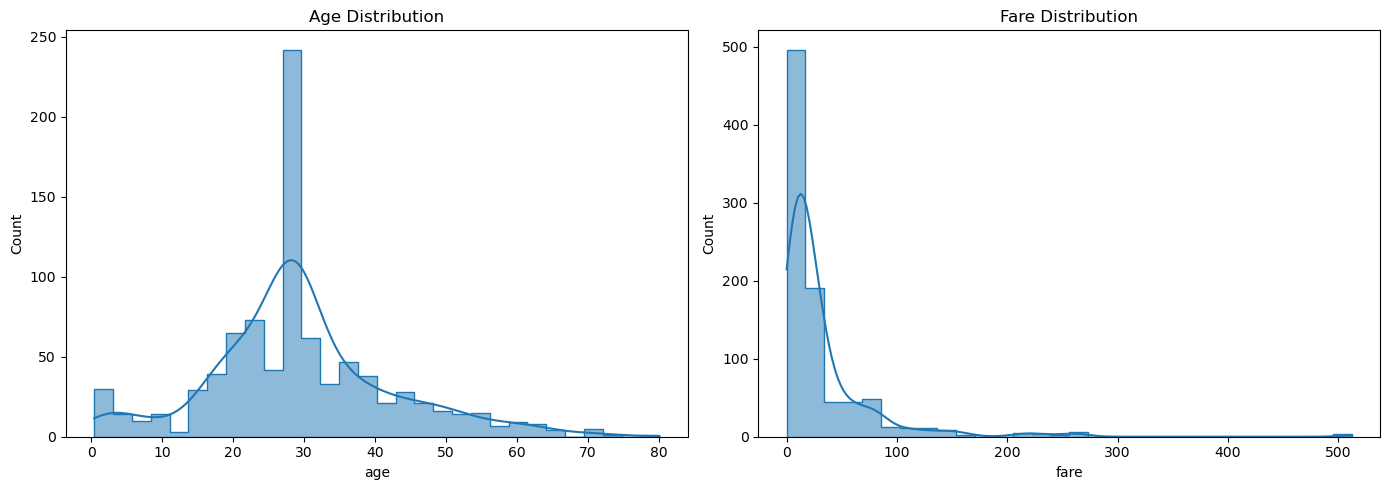

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))

sns.histplot(data=df_clean,x='age',bins=30,kde=True,element='step',ax=ax1)
ax1.set_title('Age Distribution')

sns.histplot(data=df_clean,x='fare',bins=30,kde=True,element='step',ax=ax2)
ax2.set_title('Fare Distribution')

plt.tight_layout()   
plt.show()

<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
<strong>Observation:</strong>
The age distribution is slightly right-skewed, with most passengers clustered between their mid-20s and mid-30s, and fewer observations at the higher age ranges. The fare distribution is heavily right-skewed, indicating that most passengers paid lower fares, while a small number paid significantly higher amounts, creating long-tail outliers.
</div>

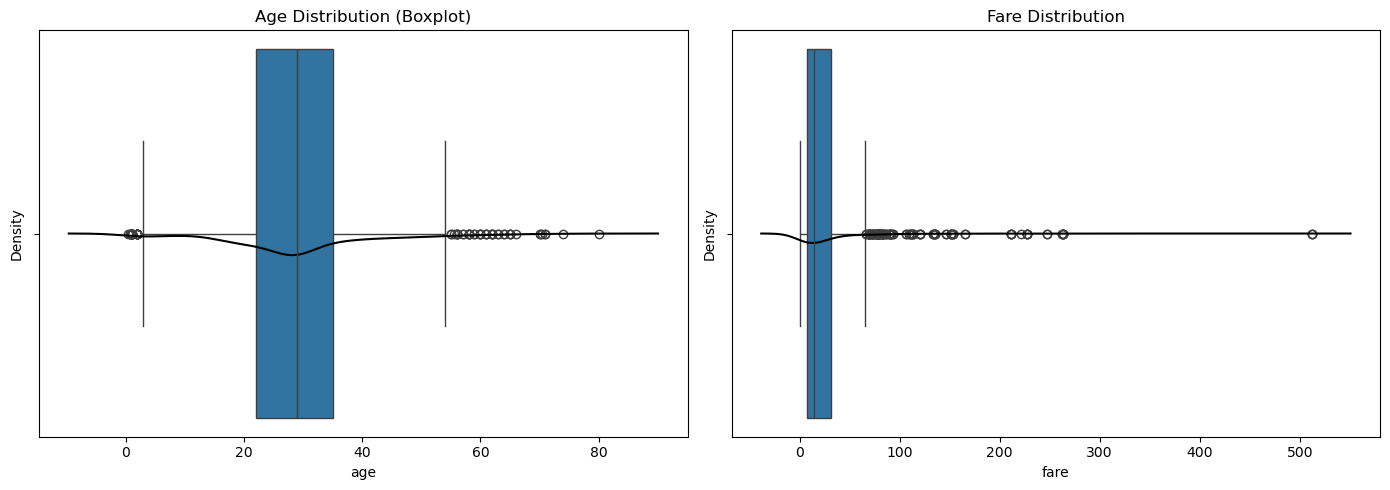

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

sns.boxplot(data=df_clean, x='age', ax=ax1)
sns.kdeplot(data=df_clean, x='age', ax=ax1, color='black')

ax1.set_title('Age Distribution (Boxplot)')

sns.boxplot(data=df_clean, x='fare', ax=ax2)
sns.kdeplot(data=df_clean, x='fare', ax=ax2, color='black')
ax2.set_title('Fare Distribution')

plt.tight_layout()
plt.show()


<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
<strong>Observation:</strong>
The boxplot helps show that scaling does not change the relative ordering or the outliers it mainly compresses the spread. 
    The KDE overlay confirms that while the scale changes, the overall shape of the distribution stays the same
</div>

In [20]:
df_clean[cols].skew()


age     0.491821
fare    4.787317
dtype: float64

<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
<strong>Observation:</strong>
This data supports what we see in the graph: age is largely centered around the mean, while fare shows much greater variation.
</div>

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3>Z score Standardization & Outlier Detection</h3>
</div>

<div style="background-color: #e8f5e9; padding: 15px; border-radius: 8px; border-left: 5px solid #2e7d32;">
<strong>Technical Note:</strong> 
From earlier analysis, I noticed that the age data is approximatley normal where as fare is skewed. So the purpose of this analysis, scaling the fare so that we have a better comparision.
</div>


In [21]:
df_clean.columns
df_zscore = df_clean[['age', 'fare']].copy()

In [22]:
from scipy import stats
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PowerTransformer


df_zscore['fare_log'] = np.log1p(df_zscore['fare'])


In [23]:
#Z score Standardization 
df_zscore['age_z'] = stats.zscore(df_zscore['age'], nan_policy='omit')
df_zscore['fare_z'] = stats.zscore(df_zscore['fare_log'], nan_policy='omit')
df_zscore

,age,fare,fare_log,age_z,fare_z
0,22.0,7.2500,2.110213,-0.571902,-0.879741
1,38.0,71.2833,4.280593,0.657785,1.361220
2,26.0,7.9250,2.188856,-0.264480,-0.798540
3,35.0,53.1000,3.990834,0.427219,1.062038
4,35.0,8.0500,2.202765,0.427219,-0.784179
...,...,...,...,...,...
886,27.0,13.0000,2.639057,-0.187625,-0.333698
887,19.0,30.0000,3.433987,-0.802468,0.487082
888,27.0,23.4500,3.196630,-0.187625,0.242007
889,26.0,30.0000,3.433987,-0.264480,0.487082


In [24]:
#Outlier Flags (|Z| > threshold) 
threshold = 3
df_outliers = df_zscore.copy()
df_outliers['age_outlier'] = df_zscore['age_z'].abs() > threshold
df_outliers['fare_outlier'] = df_zscore['fare_z'].abs() > threshold
df_outliers['any_outlier'] = df_outliers[['age_outlier', 'fare_outlier']].any(axis=1)

In [25]:
print(f"Age outliers               : {df_outliers['age_outlier'].sum()}")
print(f"Fare outliers              : {df_outliers['fare_outlier'].sum()}")
print(f"Total outliers (Age & Fare): {df_outliers['any_outlier'].sum()}")

Age outliers               : 7
Fare outliers              : 18
Total outliers (Age & Fare): 25


In [26]:
df_no_outliers = df.loc[~df_outliers['any_outlier']].copy()
print(f"\nRows before: {len(df_outliers)} | Rows after removing outliers: {len(df_no_outliers)}")


Rows before: 891 | Rows after removing outliers: 866


<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
<strong>Observation:</strong>
Survival probability varies significantly by age. Children show higher survival rates, while older passengers have lower survival, which makes age an important predictive feature versus a global median
</div>

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3>Survival Analysis by Gender</h3>
</div>

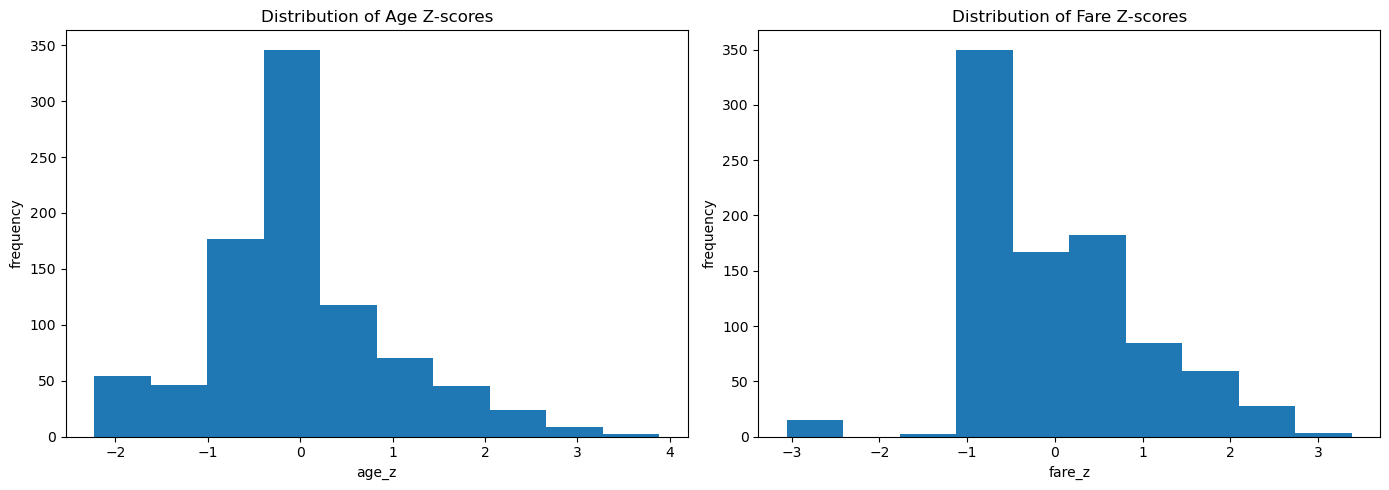

In [27]:


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

ax1.hist(df_zscore['age_z'])
ax1.set_title('Distribution of Age Z-scores')
ax1.set_xlabel('age_z')
ax1.set_ylabel('frequency')

ax2.hist(df_zscore['fare_z'])
ax2.set_title('Fare Distribution')
ax2.set_title('Distribution of Fare Z-scores')
ax2.set_xlabel('fare_z')
ax2.set_ylabel('frequency')

plt.tight_layout()
plt.show()


<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
<strong>Observation:</strong>
Using a Z-score threshold of ±3, no observations were identified as extreme outliers. This suggests that after preprocessing, the numeric features are well-distributed and do not contain values that are statistically distant from the mean. For skewed variables such as Fare, alternative methods
like IQR may be more appropriate for detecting moderate outliers    </div>

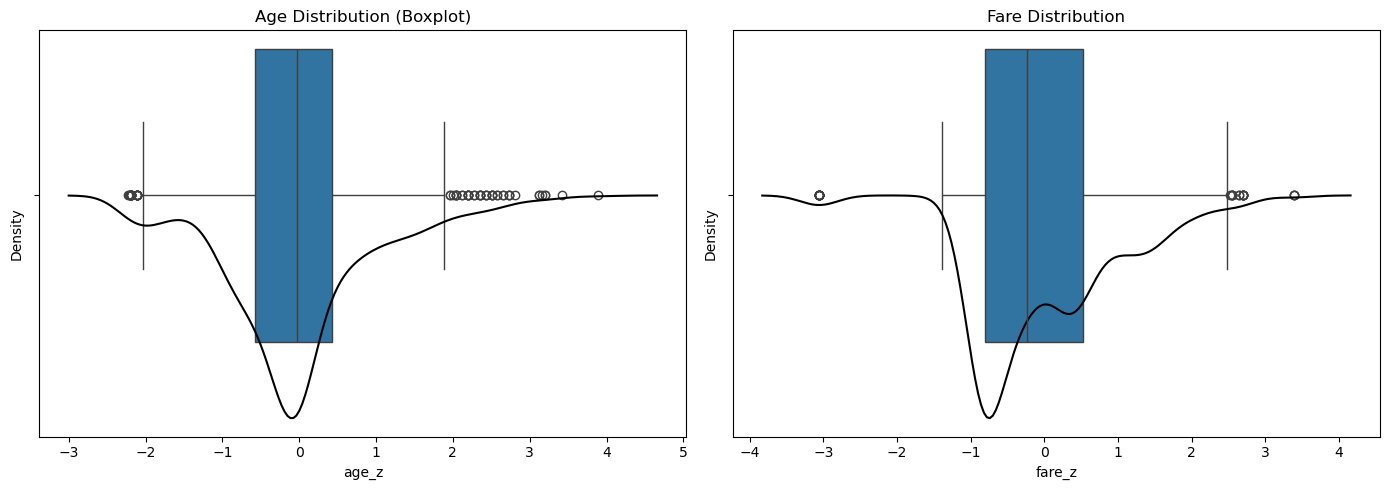

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

sns.boxplot(data=df_outliers, x='age_z', ax=ax1)
sns.kdeplot(data=df_outliers, x='age_z', ax=ax1, color='black')

ax1.set_title('Age Distribution (Boxplot)')

sns.boxplot(data=df_outliers, x='fare_z', ax=ax2)
sns.kdeplot(data=df_outliers, x='fare_z', ax=ax2, color='black')
ax2.set_title('Fare Distribution')

plt.tight_layout()
plt.show()


<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
<strong>Observation:</strong>
Boxplots reveal several IQR-based outliers in both Age and Fare, indicating moderate deviations from the central distribution. However, no observations exceed the ±3 Z-score threshold, suggesting the absence of extreme outliers. This highlights the difference between IQR-based and Z-score-based outlier detection, with IQR being more sensitive to skewed distributions.
</div>

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Probability analysis</h3>
</div>

In [87]:
overall_survival_prob = df_clean['survived'].mean()
overall_survival_prob

np.float64(0.3838383838383838)

<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
<strong> Overall Survival Probabiity: </strong>
The overall survival probability of passenger was 38% .</div>

In [31]:
survival_by_sex = df_clean.groupby('sex')['survived'].mean()
survival_by_sex

sex
0    0.742038
1    0.188908
Name: survived, dtype: float64

<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
<strong> Which gender had higher chance of probability? </strong>
Females had a much higher probability of survival than males.</div>

In [32]:
survival_by_class = df_clean.groupby('pclass')['survived'].mean()
survival_by_class

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
<strong> Observation:</strong>
First class passengers had the highest survival probability</div>

In [33]:
age_bins = [0, 12, 19, 35, 60, 100]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

df_clean['age_group'] = pd.cut(df_clean['age'], bins=age_bins, labels=age_labels)

survival_by_age_group = df_clean.groupby('age_group',observed=True)['survived'].mean()
survival_by_age_group


age_group
Child          0.579710
Teen           0.410526
Young Adult    0.352941
Adult          0.400000
Senior         0.227273
Name: survived, dtype: float64

<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
<strong> Survival Probability by Age Group:</strong>
First class passengers had the highest survival probability</div>

In [88]:
df_clean['fare_group'] = pd.cut(df_clean['fare'], bins=3, labels=['Low', 'Mid', 'High'])

survival_by_fare = (df_clean.groupby('fare_group', observed=True)['survived'].mean())


TypeError: qcut() got an unexpected keyword argument 'bins'

In [80]:
def to_percent(series, decimals=2):
    return round((series * 100),decimals)
pd.qcut(df_clean['fare'], q=4, retbins=True)



(0       (-0.001, 7.91]
 1      (31.0, 512.329]
 2       (7.91, 14.454]
 3      (31.0, 512.329]
 4       (7.91, 14.454]
             ...       
 886     (7.91, 14.454]
 887     (14.454, 31.0]
 888     (14.454, 31.0]
 889     (14.454, 31.0]
 890     (-0.001, 7.91]
 Name: fare, Length: 891, dtype: category
 Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]],
 array([  0.    ,   7.9104,  14.4542,  31.    , 512.3292]))

In [81]:
gender_labels = {0: 'Female',    1: 'Male'}
print("\nGender Survival Probability")
for sex, label in gender_labels.items():
    print(f"{label} : {to_percent(survival_by_sex[sex])} %")
    
print("\nPclass Survival Probability")
class_labels = {1: "First Class",2: "Second Class",3: "Third Class"}
for cls, label in class_labels.items():
    print(f"{label} : {to_percent(survival_by_class[cls])} %")


print("\nAge Group Survival Probability ")
for group, prob in survival_by_age_group.items():
    print(f"{group} : {to_percent(prob)} %")

print("\nFare Group Survival Probability")
for group, prob in survival_by_fare.items():
    print(f"{group} : {to_percent(prob)} %")




Gender Survival Probability
Female : 74.2 %
Male : 18.89 %

Pclass Survival Probability
First Class : 62.96 %
Second Class : 47.28 %
Third Class : 24.24 %

Age Group Survival Probability 
Child : 57.97 %
Teen : 41.05 %
Young Adult : 35.29 %
Adult : 40.0 %
Senior : 22.73 %

Fare Group Survival Probability
Low : 37.66 %
Mid : 64.71 %
High : 100.0 %


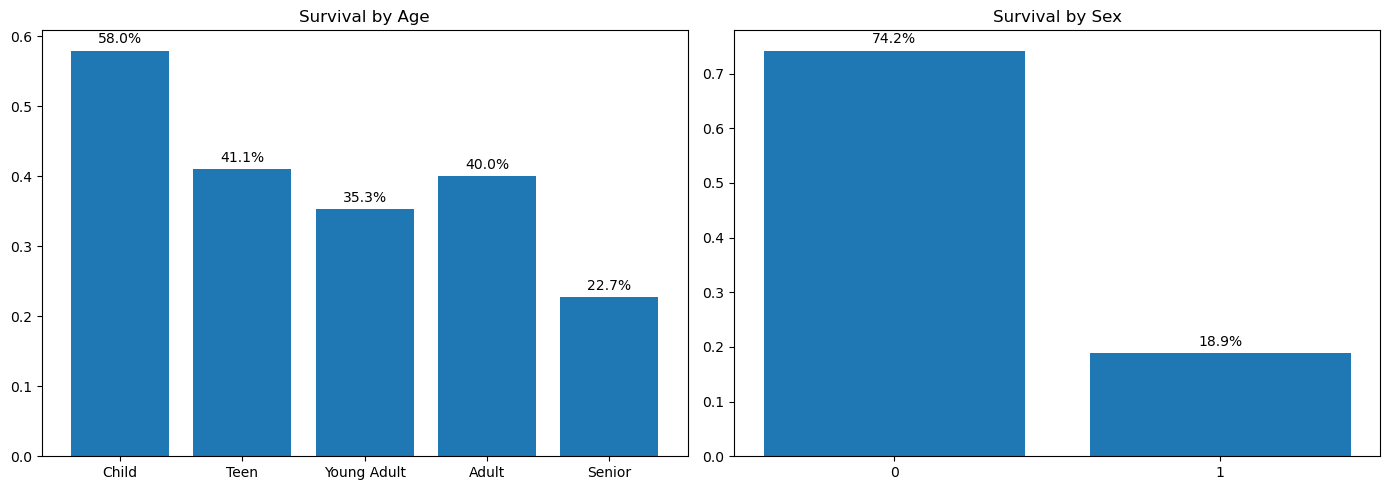

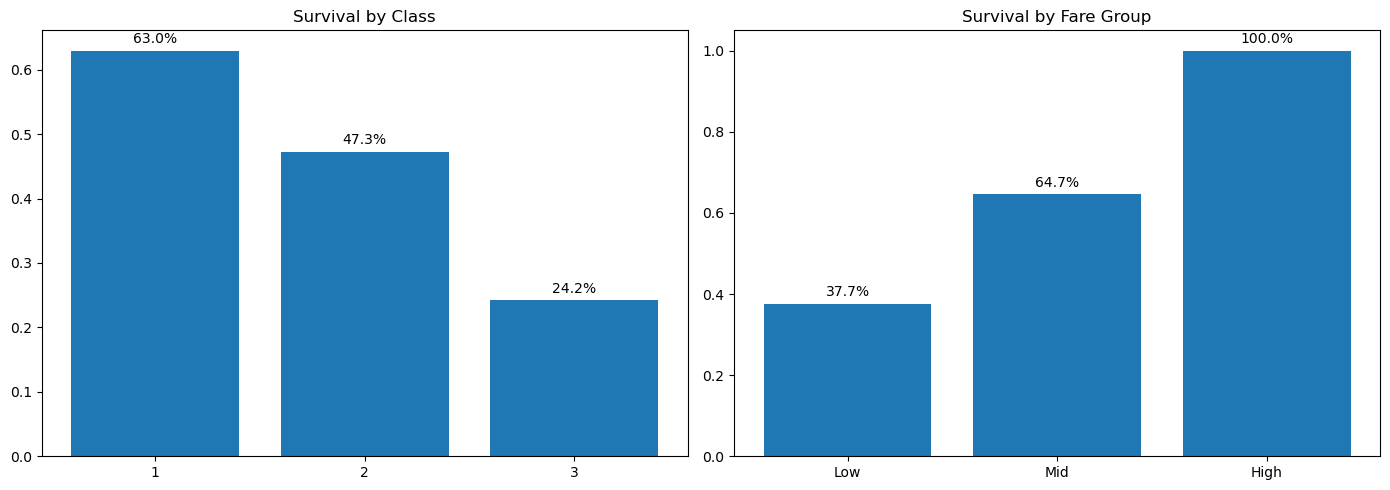

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

ax1.bar(survival_by_age_group.index.astype(str), survival_by_age_group.values)
ax1.set_title('Survival by Age')

ax2.bar(survival_by_sex.index.astype(str), survival_by_sex.values)
ax2.set_title('Survival by Sex')

for ax in [ax1, ax2]:
    for container in ax.containers:
        ax.bar_label(container,labels=[f"{v*100:.1f}%" for v in container.datavalues],padding=3)

plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

ax1.bar(survival_by_class.index.astype(str), survival_by_class.values)
ax1.set_title('Survival by Class')

ax2.bar(survival_by_fare.index.astype(str), survival_by_fare.values)
ax2.set_title('Survival by Fare Group')

for ax in [ax1, ax2]:
    for container in ax.containers:
        ax.bar_label(container,labels=[f"{v*100:.1f}%" for v in container.datavalues],padding=3)

plt.tight_layout()
plt.show()


<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
<strong>Observation:</strong>
Probability analysis was conducted to estimate the likelihood of survival and to understand how survival outcomes varied across key passenger characteristics. The overall survival probability was relatively low, establishing a baseline risk for all passengers.

Conditional probability analysis revealed that gender was the strongest predictor of survival, with female passengers exhibiting a substantially higher survival probability than male passengers. Passenger class also showed a clear gradient, where first-class passengers had the highest likelihood of survival, followed by second-class and third-class passengers. This pattern highlights the role of socioeconomic status in survival outcomes.
When examining age groups, children demonstrated higher survival probabilities compared to adults, consistent with evacuation prioritization. Fare-based analysis further reinforced socioeconomic effects, as passengers in higher fare groups showed significantly higher survival probabilities than those in lower fare groups.
Overall, probability analysis indicates that survival on the Titanic was not random but strongly influenced by demographic and socioeconomic factors. These findings provide clear justification for using gender, passenger class, age, and fare as key predictors in downstream predictive modeling.</div>

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> ✅ Final Summary </h3></div>

This analysis examined passenger survival on the Titanic using a structured analytical approach, progressing from data exploration to statistical validation and probability-based insights.

<strong> Exploratory Data Analysis & Distribution Review </strong>

Initial distribution analysis showed that Age is approximately normally distributed, while Fare is highly right-skewed. This justified the use of different preprocessing strategies: direct Z-score standardization for Age and transformation-aware approaches for Fare. Boxplots and histograms revealed natural variability in the data without obvious data quality issues.

<strong> Outlier Detection </strong>

Z-score analysis with a conservative threshold of ±3 identified no extreme outliers, indicating that the dataset does not contain anomalous values far from the mean after preprocessing. However, IQR-based analysis revealed moderate outliers, particularly in Fare, which is expected for skewed financial data. This distinction highlights the importance of choosing outlier detection methods appropriate to the underlying distribution.

<strong> Probability Analysis </strong>
<ul>
  <li>Probability analysis quantified survival likelihood and demonstrated that survival outcomes were not random.</li>
  <li>The overall survival probability was relatively low, establishing a clear baseline risk.</li>
  <li>Gender emerged as the strongest predictor, with female passengers having a substantially higher survival probability than male passengers.</li>
  <li>Passenger class showed a clear socioeconomic gradient, with first-class passengers exhibiting the highest survival rates, followed by second and third class.</li>
  <li>Age group analysis indicated higher survival probabilities among children, consistent with evacuation prioritization.</li>
  <li>Fare-based analysis reinforced socioeconomic effects, as higher fare groups were associated with higher survival probabilities.</li>
  <li>A 100% survival rate observed in the highest fare group was driven by a very small sample size, highlighting the importance of evaluating support counts (N) alongside probabilities to avoid misleading interpretations.</li>
</ul>
<strong> Visualization & Interpretation </strong>

Targeted visualizations (survival probability by gender, passenger class, and fare group) made these relationships immediately interpretable. Annotated bar charts reinforced the magnitude of differences across groups and supported the probability findings.

<strong> Summary </strong>
<ul>
    <li> The Age variable is approximately normally distributed with a moderate spread, while Fare is heavily right-skewed with a long tail. This indicates that Age can be analyzed using standard statistical methods, whereas Fare requires transformation or robust methods to avoid distortion from extreme values.
</li>
    <li>
        Using a conservative Z-score threshold of ±3, no extreme outliers were detected, indicating that the dataset does not contain anomalous values far from the mean after preprocessing. However, IQR-based analysis identified moderate outliers in Fare, which is expected for skewed financial data. These values represent natural variability rather than data errors and were retained.
    </li>
    <li>The overall survival probability is relatively low, establishing a baseline risk for passengers on the Titanic. This confirms that survival was not common and motivates further investigation into factors influencing survival outcomes.
    </li>
    <li>
        Survival probability differs substantially by gender. Female passengers had a significantly higher likelihood of survival than male passengers, indicating that gender was the strongest single predictor of survival.
    </li>
    <li>
        Passenger class shows a clear survival gradient. First-class passengers had the highest survival probability, followed by second class and then third class. This pattern highlights the strong influence of socioeconomic status on survival outcomes.
    </li>
    <li>
        Age-based analysis reveals that children had higher survival probabilities than adults, consistent with evacuation prioritization. Survival probability decreases for older age groups, suggesting that age played a meaningful role in survival decisions.
    </li>
    <li>
        Survival probability increases with fare level. Passengers in higher fare groups consistently show higher survival rates, reinforcing the relationship between fare (as a proxy for wealth and access) and survival outcomes.
    </li>
    <li>
        Some groups, particularly the highest fare group, show survival probabilities of 100%. Inspection of group sizes revealed that these results are driven by very small sample sizes, not guaranteed outcomes. Therefore, probabilities were interpreted alongside support counts (N) to avoid misleading conclusions.
    </li>
    <li>
        Gender and passenger class are the strongest drivers of survival, followed by fare and age group. These variables exhibit the largest differences in survival probability and provide the most explanatory power.
    </li>
    <li>
        Yes. The dataset is statistically well-behaved after preprocessing, contains no extreme anomalies, and has clearly identified predictive features. Gender, passenger class, age, and fare are well-justified inputs for downstream classification models such as logistic regression.
    </li>
</ul>

<strong>Conclusion </strong>

Overall, the analysis shows that survival on the Titanic was driven primarily by demographic and socioeconomic factors, particularly gender and passenger class, with age and fare providing additional explanatory power. The dataset is well-behaved statistically, requiring no aggressive outlier removal, and the findings provide strong justification for selecting these variables in downstream predictive modeling such as logistic regression.